In [78]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

from fungsi import sigmoid

# Generate Data

## Data Otong

In [79]:
# tinggi badan
x1 = np.array([18 + 1*np.random.randn() for i in range(1,100)])
# berat badan
x2 = np.array([5 + 1*np.random.randn() for i in range(1,100)])
# status otong
y1 = np.array([1 for i in range(1,100)])
# status ucup
y2 = np.array([0 for i in range(1,100)])
# label
label = ["otong" for i in range(1,100)]

# data compilasi
data_otong = {
	'x1':x1,
	'x2':x2,
	'y1':y1,
	'y2':y2,
	'label':label,
}

# data frame
data_frame_1 = pd.DataFrame(data=data_otong)

In [80]:
print(data_frame_1)

           x1        x2  y1  y2  label
0   18.457877  3.905578   1   0  otong
1   18.341258  4.012305   1   0  otong
2   17.342222  4.561626   1   0  otong
3   17.720481  4.256217   1   0  otong
4   18.787607  4.116506   1   0  otong
..        ...       ...  ..  ..    ...
94  16.514008  5.022133   1   0  otong
95  19.792485  5.756503   1   0  otong
96  17.832847  6.302602   1   0  otong
97  19.611068  4.841429   1   0  otong
98  15.947240  6.075181   1   0  otong

[99 rows x 5 columns]


## Data Ucup

In [81]:
# tinggi badan
x1 = np.array([10 + 1*np.random.randn() for i in range(1,100)])
# berat badan
x2 = np.array([8 + 1*np.random.randn() for i in range(1,100)])
# status otong
y1 = np.array([0 for i in range(1,100)])
# status ucup
y2 = np.array([1 for i in range(1,100)])
# label
label = ["ucup" for i in range(1,100)]

# data compilasi
data_ucup = {
	'x1':x1,
	'x2':x2,
	'y1':y1,
	'y2':y2,
	'label':label,
}

# data frame
data_frame_2 = pd.DataFrame(data=data_ucup)

In [82]:
print(data_frame_2)

           x1        x2  y1  y2 label
0    9.951737  8.839578   0   1  ucup
1   10.492366  6.134623   0   1  ucup
2   10.433426  6.922032   0   1  ucup
3   10.895391  7.170203   0   1  ucup
4   11.200194  7.421145   0   1  ucup
..        ...       ...  ..  ..   ...
94   8.616900  8.702309   0   1  ucup
95  10.110225  8.042860   0   1  ucup
96   9.469162  7.998276   0   1  ucup
97  10.619605  7.668880   0   1  ucup
98   8.268681  8.381217   0   1  ucup

[99 rows x 5 columns]


## Gabungkan data

In [83]:
data_frame = pd.concat([data_frame_1,data_frame_2])
data_frame = shuffle(data_frame)
data_frame.reset_index(inplace=True,drop=True)

In [84]:
print(data_frame)

            x1        x2  y1  y2  label
0    17.438644  5.717908   1   0  otong
1    10.151747  7.656394   0   1   ucup
2    15.947240  6.075181   1   0  otong
3    17.222221  7.080158   1   0  otong
4     9.905091  9.732710   0   1   ucup
..         ...       ...  ..  ..    ...
193  18.976721  6.050084   1   0  otong
194  18.110733  5.559253   1   0  otong
195  18.032018  5.838846   1   0  otong
196  10.895391  7.170203   0   1   ucup
197  18.745408  5.198861   1   0  otong

[198 rows x 5 columns]


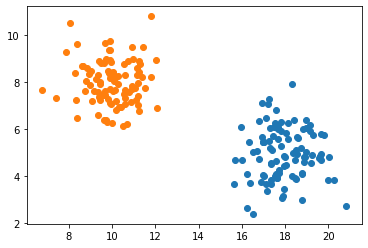

In [85]:
plt.scatter(data_frame_1.x1,data_frame_1.x2)
plt.scatter(data_frame_2.x1,data_frame_2.x2)
plt.show()

# Neural Networknya

## 1. Matrix Weight

In [101]:
w11 = np.random.uniform(-0.01,0.01)
w12 = np.random.uniform(-0.01,0.01)
w21 = np.random.uniform(-0.01,0.01)
w22 = np.random.uniform(-0.01,0.01)

W = np.array([[w11,w12],[w21,w22]])

In [102]:
print(W)

[[ 0.00851243  0.00996525]
 [-0.0046621   0.00549688]]


## 2. Iterasi Neural Networknya

In [103]:
learning_rate = 0.1
answer = []
error_array = np.zeros((2,len(data_frame)))
for index,baris in data_frame.iterrows():
	W_lama = W
	input = np.array([[baris.x1],[baris.x2]])
	output_hidden = np.dot(W_lama,input)
	output_learn = sigmoid(output_hidden)
	output_actual = np.array([[baris.y1],[baris.y2]])

	error = output_actual - output_learn

	delta_W = np.dot(learning_rate*error*output_learn*(1-output_learn),input.T)

	W_baru = W_lama + delta_W
	W = W_baru

	error_array[:,index] = error.T*error.T

	tebakan = np.argmax(output_learn)
	jawaban = np.argmax(output_actual)

	label_tebakan = "ucup" if tebakan == 1 else "otong"

	print(f"index = {index}, tebakan = {label_tebakan}, jawaban = {baris.label}")

	if tebakan == jawaban:
		answer.append(1)
	else:
		answer.append(0)

index = 0, tebakan = otong, jawaban = otong
index = 1, tebakan = otong, jawaban = ucup
index = 2, tebakan = otong, jawaban = otong
index = 3, tebakan = otong, jawaban = otong
index = 4, tebakan = otong, jawaban = ucup
index = 5, tebakan = otong, jawaban = otong
index = 6, tebakan = otong, jawaban = otong
index = 7, tebakan = otong, jawaban = otong
index = 8, tebakan = otong, jawaban = ucup
index = 9, tebakan = otong, jawaban = otong
index = 10, tebakan = otong, jawaban = ucup
index = 11, tebakan = otong, jawaban = otong
index = 12, tebakan = otong, jawaban = otong
index = 13, tebakan = otong, jawaban = ucup
index = 14, tebakan = otong, jawaban = otong
index = 15, tebakan = otong, jawaban = ucup
index = 16, tebakan = ucup, jawaban = ucup
index = 17, tebakan = otong, jawaban = otong
index = 18, tebakan = otong, jawaban = otong
index = 19, tebakan = otong, jawaban = otong
index = 20, tebakan = otong, jawaban = otong
index = 21, tebakan = otong, jawaban = otong
index = 22, tebakan = otong,

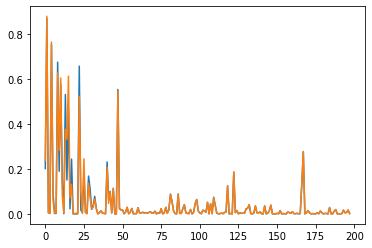

In [104]:
plt.plot(error_array.T)

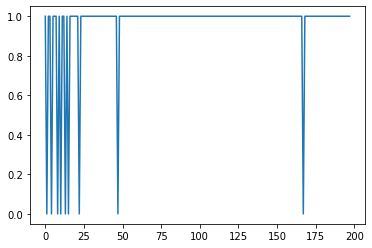

In [105]:
plt.plot(answer)

In [110]:
x1 = 19
x2 = 3

input = np.array([[x1],[x2]])
output_hidden = np.dot(W,input)
output_prediction = sigmoid(output_hidden)

prediction = np.argmax(output_prediction)

label_prediction = "ucup" if prediction == 1 else "otong"

print(f"tinggi = {x1*10}, berat = {x2*10}, adalah {label_prediction}")

tinggi = 190, berat = 30, adalah otong
